<a href="https://colab.research.google.com/github/SirMosweu/Data-Analysis/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superstore Sales Analysis**

# **1. INRODUCTION**
This project explores the Superstore dataset to uncover patterns in sales performance across time, product categories, regions, and customers.  
The analysis follows an Exploratory Data Analysis (EDA) approach, focusing on cleaning, feature engineering, and visualization to better understand the dataset.  

By examining monthly sales trends, category contributions, regional differences, and top‑performing products and customers, we aim to identify key drivers of revenue and highlight opportunities for growth.  
The ultimate goal is to demonstrate data storytelling skills — turning raw data into actionable business insights that can guide decision‑making and strategy.


## **2. DATA PREPARATION**

In [46]:
import pandas as pd

# Load dataset
df = pd.read_csv("Superstore.csv")

# Quick look
print(df.shape)
df.head()


(9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [47]:

# Check for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [48]:
# Drop rows with missing postal codes
df = df.dropna(subset=['Postal Code'])


In [49]:
# Check for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [50]:
# Converting Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')


In [51]:
df['Order Date'].dtype


dtype('<M8[ns]')

In [52]:
# Extracting Year, Month, and Year-Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')


# **3. Exploratory Data Analysis (EDA)**

**3.1 Monthly Sales Trend**

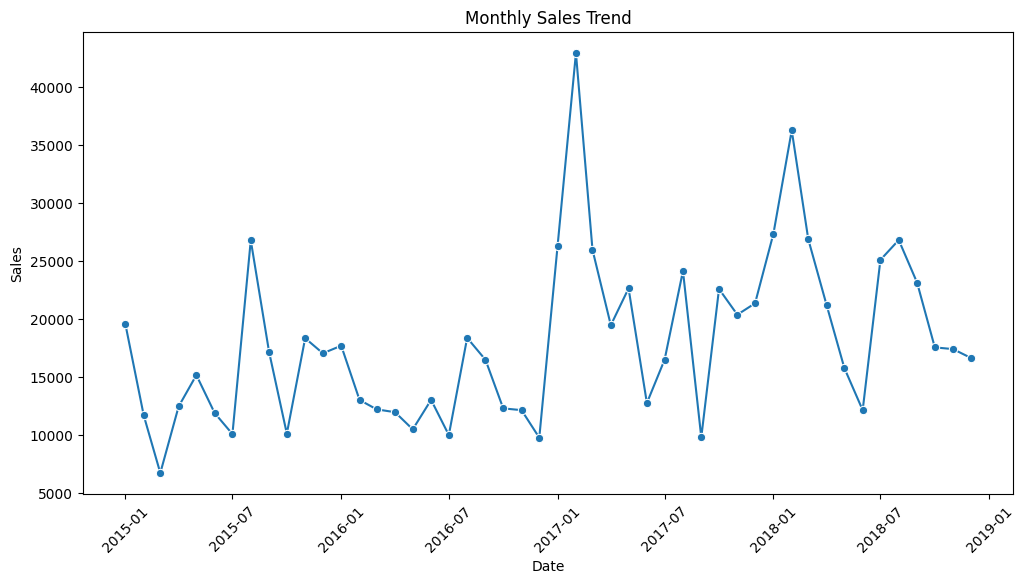

In [53]:

# 1. Aggregation of monthly sales
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# 2. Converting YearMonth to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# 3. Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


In [54]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Year', 'Month', 'YearMonth']


**3.2 Top 20 Products by Sale**

/tmp/ipython-input-1251716487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Sales', y='Product Name', palette='cividis')


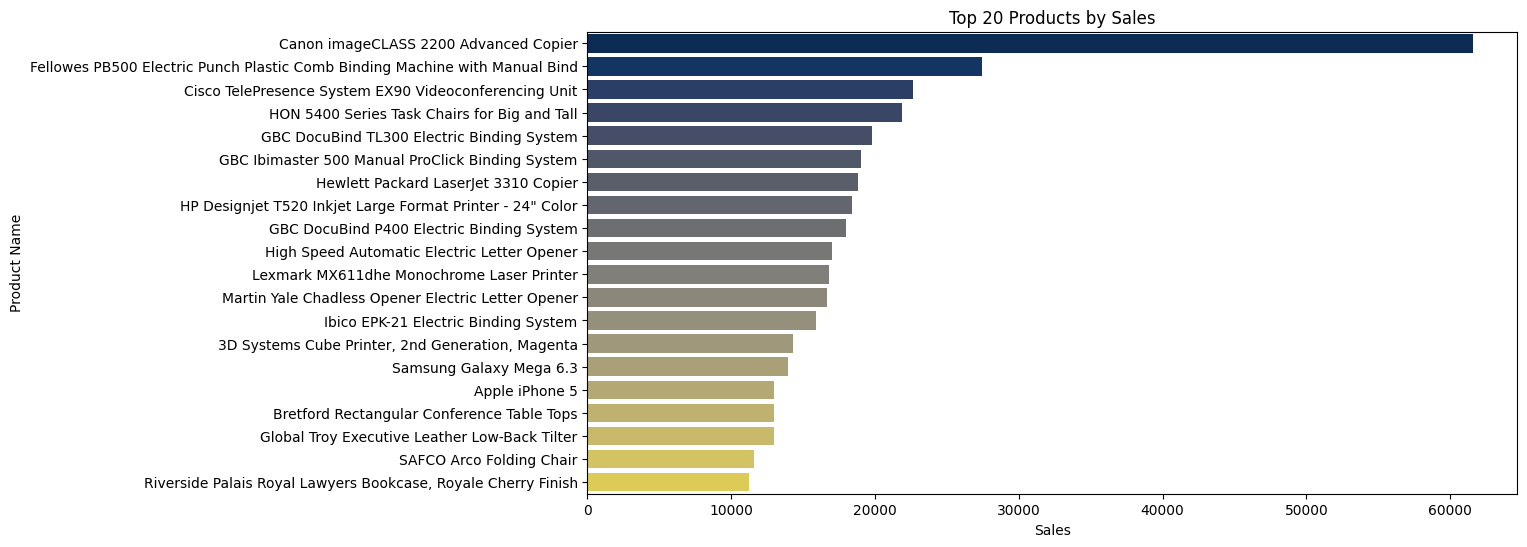

In [60]:
# Aggregation of sales by product
product_sales = df.groupby('Product Name')['Sales'].sum().nlargest(20).reset_index()

# Plot top 20 products by sales
plt.figure(figsize=(12,6))
sns.barplot(data=product_sales, x='Sales', y='Product Name', palette='cividis')
plt.title("Top 20 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.show()


**3.3 Sales by Category**

/tmp/ipython-input-4251750131.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = product_category_sales.groupby('Category').apply(


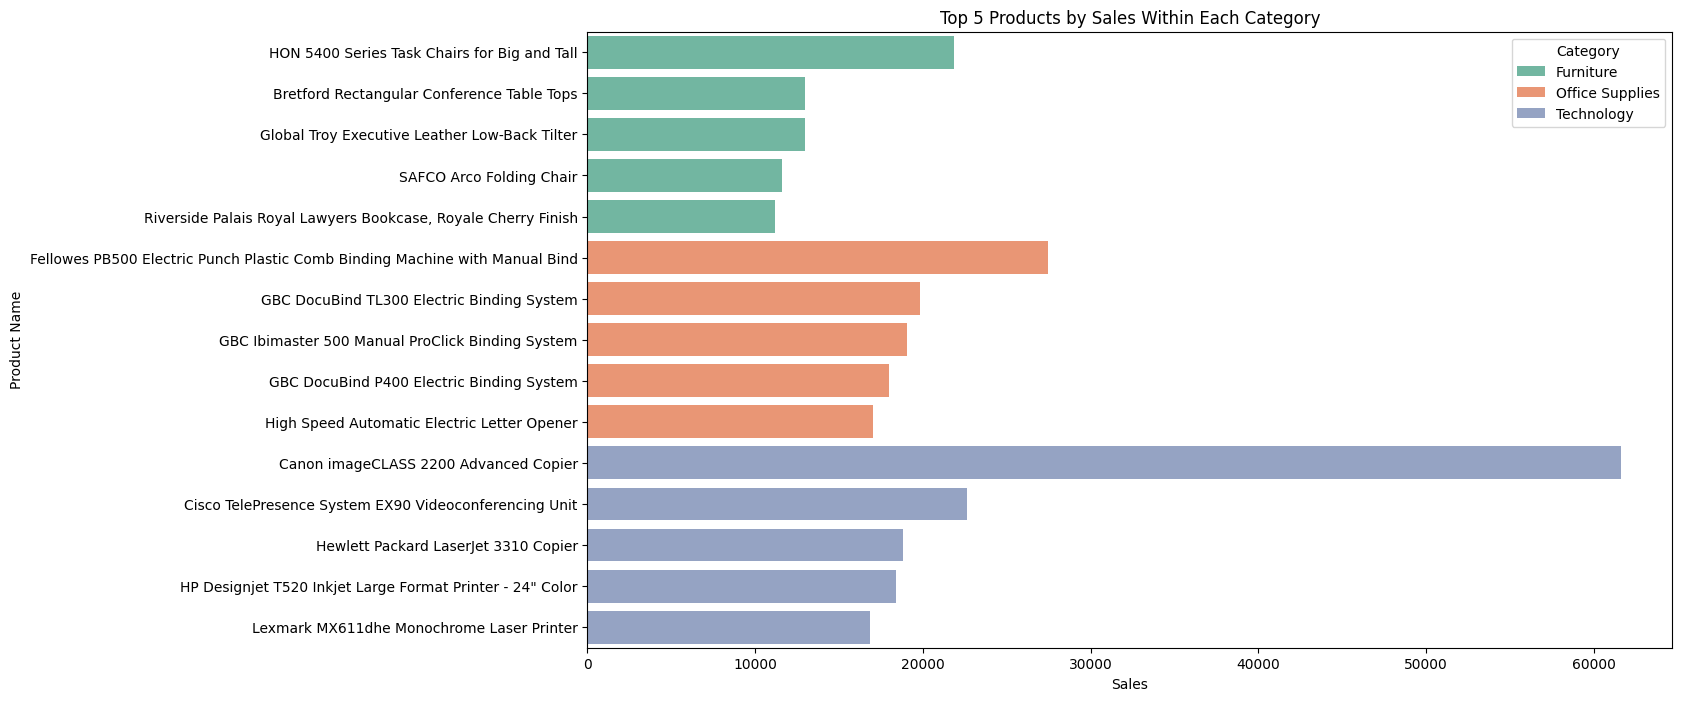

In [56]:
# Aggregation sales by product and category
product_category_sales = df.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()

# For each category, select top 5 products
top_products_by_category = product_category_sales.groupby('Category').apply(
    lambda x: x.nlargest(5, 'Sales')
).reset_index(drop=True)

# Plot grouped bar chart
plt.figure(figsize=(14,8))
sns.barplot(data=top_products_by_category, x='Sales', y='Product Name', hue='Category', dodge=False, palette='Set2')
plt.title("Top 5 Products by Sales Within Each Category")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.legend(title="Category")
plt.show()


**3.4 Sales by Region**

/tmp/ipython-input-845797033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales', palette='coolwarm')


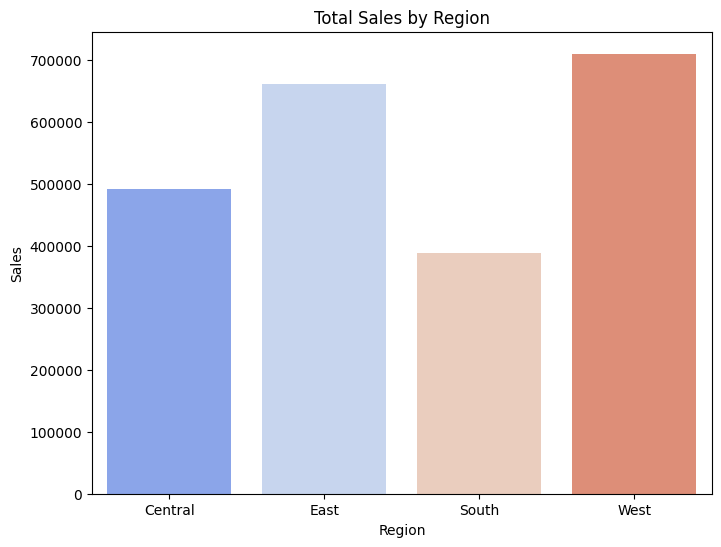

In [57]:
# sales Aggregation by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Plot by region sales
plt.figure(figsize=(8,6))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='coolwarm')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.show()


**3.5 Top 10 Customers**

/tmp/ipython-input-2888151734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='magma')


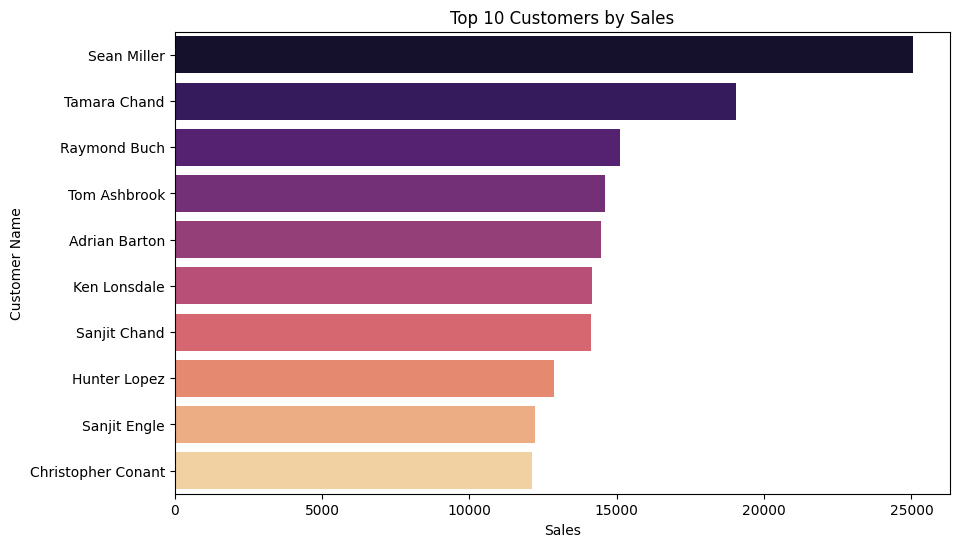

In [58]:
# Top 10 customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()

# Plot of top customers
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='magma')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales")
plt.ylabel("Customer Name")
plt.show()


**3.6 Sales by State**

/tmp/ipython-input-3420804612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='Sales', y='State', palette='plasma')


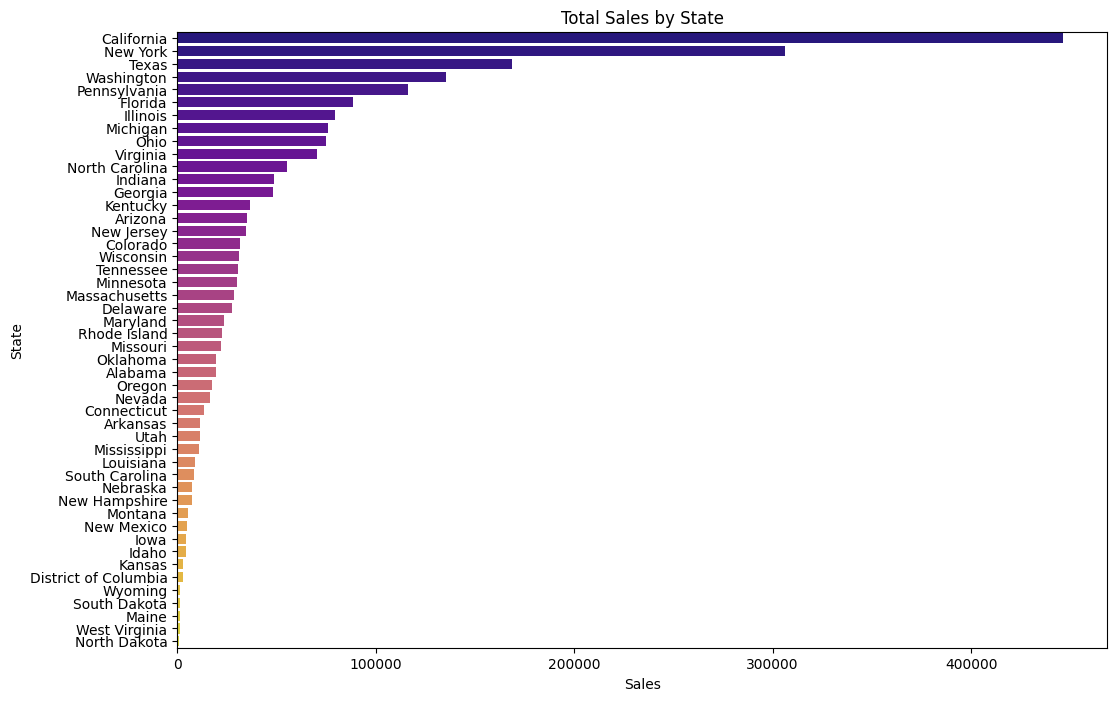

In [59]:
# Aggregation of sales by state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sorting by sales for better readability
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12,8))
sns.barplot(data=state_sales, x='Sales', y='State', palette='plasma')
plt.title("Total Sales by State")
plt.xlabel("Sales")
plt.ylabel("State")
plt.show()


**3.7 Distribution of Sales per Order**

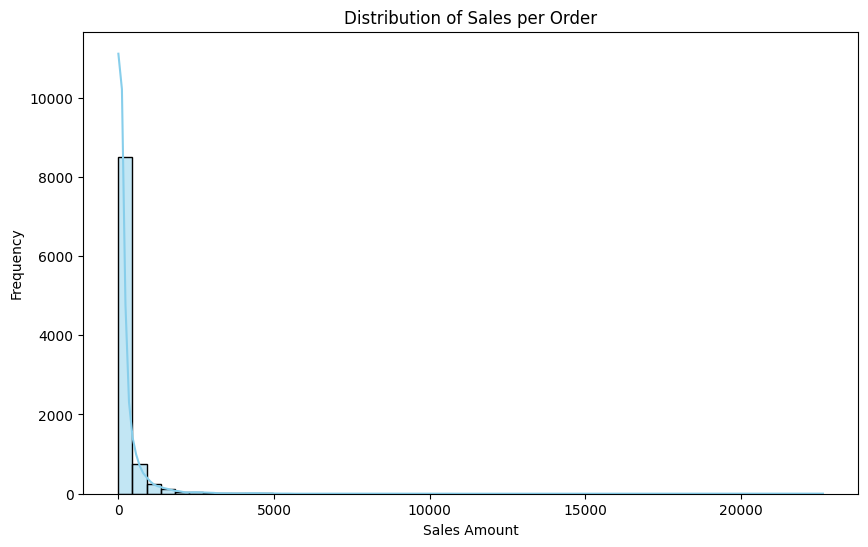

In [61]:
# Distribution of individual order sales
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Sales per Order")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


**3.8 Distribution of Orders by Month**

/tmp/ipython-input-594533910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='viridis')


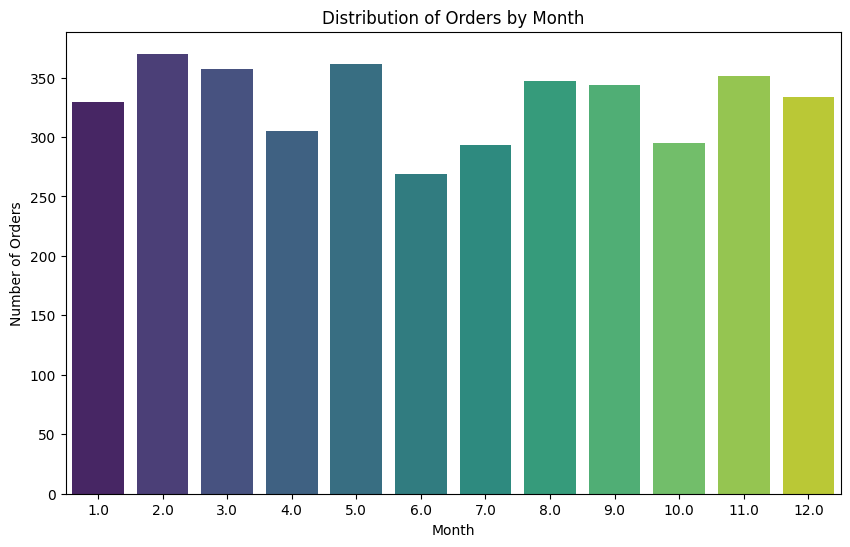

In [62]:
# Count of orders by month
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Month', palette='viridis')
plt.title("Distribution of Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


**3.9 Distribution of Sales by Customer**

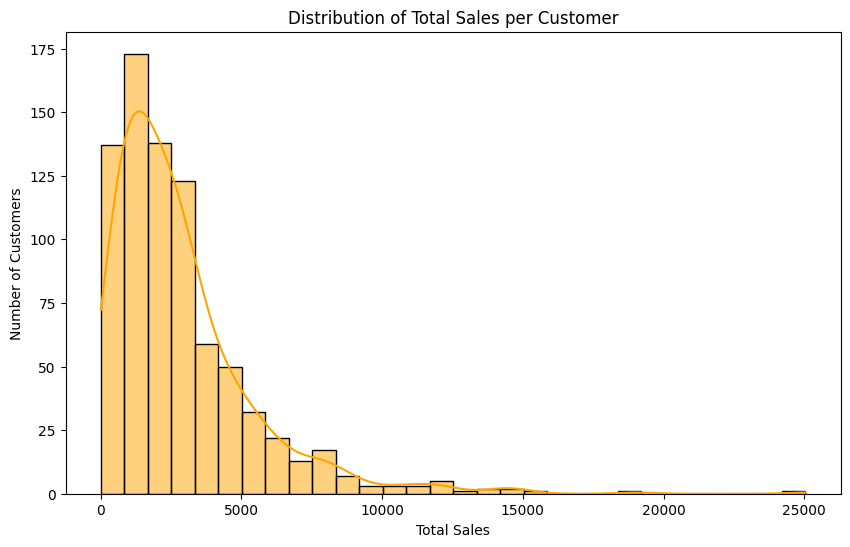

In [65]:
# Aggregation of sales per customer
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Distribution of customer sales totals
plt.figure(figsize=(10,6))
sns.histplot(customer_sales['Sales'], bins=30, kde=True, color='orange')
plt.title("Distribution of Total Sales per Customer")
plt.xlabel("Total Sales")
plt.ylabel("Number of Customers")
plt.show()


# **4. Executive Summary**

 **Key Findings**
- Seasonality: Monthly sales show clear peaks, indicating seasonal demand patterns.
- Category Performance: Technology dominates sales, while Furniture lags behind.
- Regional Insights: Certain regions consistently outperform others, highlighting geographic opportunities.
- Customer Concentration: A small group of customers drives a large share of revenue.
- Product Leaders: Specific products within each category are the main revenue drivers.
- Order Sales Distribution: Most orders are small, but a few large ones skew total revenue.
- Monthly Order Distribution: Order counts vary by month, confirming seasonal demand.
- Customer Sales Distribution: Revenue is concentrated among a small set of customers, reinforcing the importance of loyalty programs.


 **Recommendations**
- Align marketing campaigns with seasonal peaks to maximize revenue.
- Focus investment on Technology growth; re‑evaluate Furniture strategy.
- Expand in strong regions and tailor campaigns for weaker ones.
- Build loyalty programs for top customers to retain and grow their value.
- Use product‑level insights to optimize inventory and promotions.
